In [1]:
# import needed files. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = "hayf_.xlsx"
df = pd.read_excel(file)

# forward fill df.year and change to df.year to int
df['year'] = df['year'].ffill()
df['year'] = df['year'].astype(int)

# Assuming df is your DataFrame and 'date' is the column of interest

# Forward fill missing values
df['date'] = df['date'].ffill()

# Convert the 'date' column to datetime, coercing errors into 'NaT'
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Fill 'NaT' values with a specific date (e.g., "1980-01-01")
specific_date = "1980-01-01"  # Modify as needed
df['date'] = df['date'].fillna(pd.to_datetime(specific_date))


# fill nan df.city and df.venue with 'unknown'
df['city'] = df['city'].fillna('unknown').astype(str)
df['venue'] = df['venue'].fillna('unknown').astype(str)

# fill face value with average of values around it and convert to float
for i in range(len(df['face value'])):
    if pd.isna(df['face value'].iloc[i]):
        # Calculate the mean of the last 3 non-NaN preceding values
        mean_val = df['face value'].iloc[max(0, i - 3):i].mean().round(2)
        df.at[i, 'face value'] = mean_val

df['face value'] = df['face value'].astype('float64')

# fill nan in df['anything written on ticket'] with 'nothing'
df['anything written on ticket'] = df['anything written on ticket'].fillna('nothing').astype(str)

# Replace all backslashes with nothing
df['anything written on ticket'] = df['anything written on ticket'].str.replace(r"\\", "")

# Replace erratic single quotes around commas and at the start/end of strings
df['anything written on ticket'] = (df['anything written on ticket']
                                    .str.replace(r"\'\,", "',").replace(r",\'",",'").str.strip("'\" "))

# Further strip spaces and double quotes
df['anything written on ticket'] = df['anything written on ticket'].str.strip()

# set index to the df.date column and sort asc
df = df.set_index(df['date'])
df = df.sort_index()

# write to excel
# file = 'updated_hayf.xlsx'
# df.to_excel(file)


In [3]:
file = "updated_hayf.xlsx"
df_updated = pd.read_excel(file)
df_updated = df_updated.set_index('date', inplace=False)
df_updated.head()

,Artist,year,city,face value,venue,date.1,anything written on ticket,Unnamed: 7
date,,,,,,,,
1971-04-24,Bloodrock,1971,Winston Salem,7.0,Memorial Coliseum,1971-04-24,nothing,NaN
1971-04-24,Grand Funk,1971,Winston Salem,6.0,Memorial Coliseum,1971-04-24,nothing,NaN
1972-12-10,Deep Purple,1972,Charlotte,9.5,Charlotte Coliseum,1972-12-10,nothing,NaN
1973-02-12,Grand Funk,1973,Winston Salem,5.0,Memorial Coliseum,1973-02-12,nothing,NaN
1973-05-19,Jethro Tull,1973,Greensboro,5.0,Greensboro Coliseum,1973-05-19,nothing,NaN


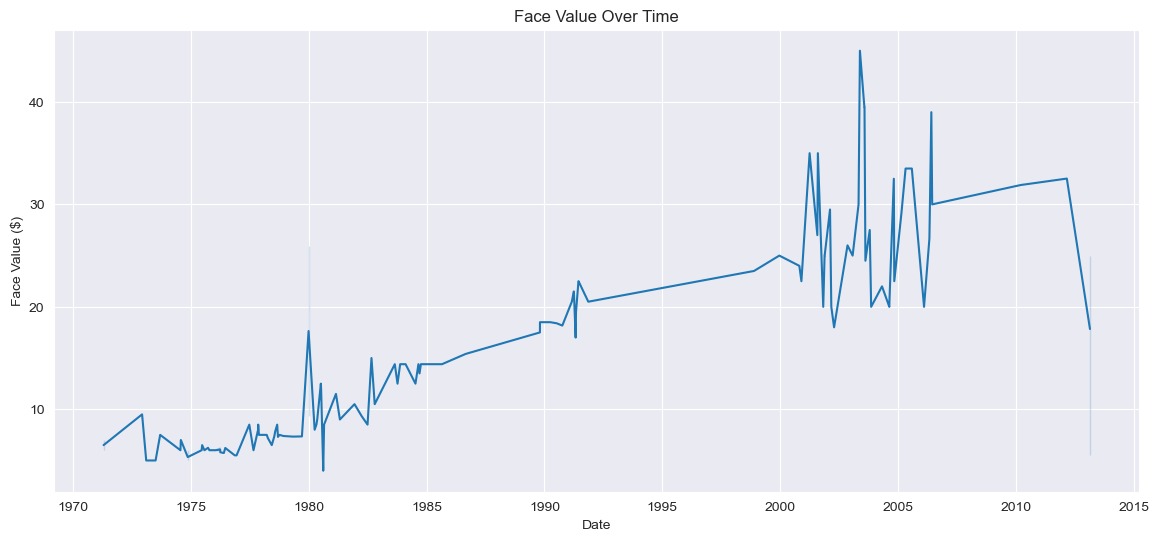

In [4]:


# Set the date column as the index if it's not already

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_updated, x=df_updated.index, y='face value')
plt.title('Face Value Over Time')
plt.xlabel('Date')
plt.ylabel('Face Value ($)')
plt.show()


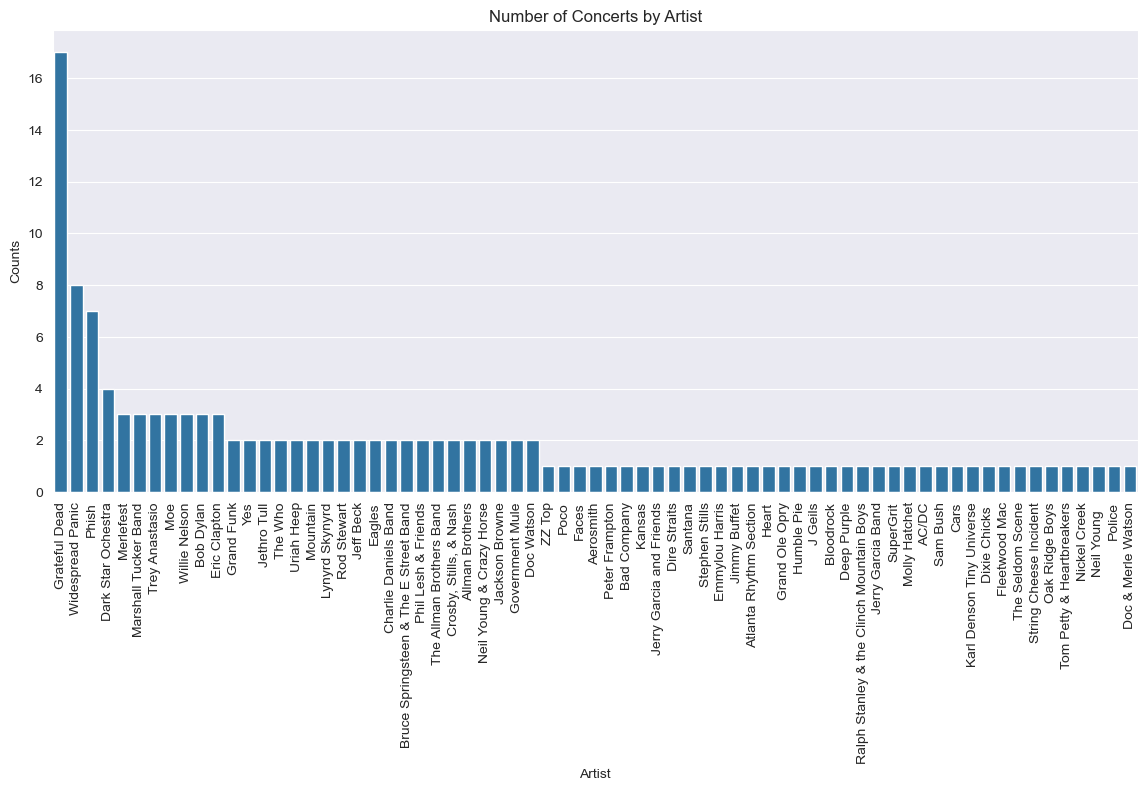

In [5]:
# Calculate counts per artist
artist_counts = df_updated['Artist'].value_counts().reset_index()
artist_counts.columns = ['Artist', 'Counts']

# Sort artists by count
artist_counts = artist_counts.sort_values(by='Counts', ascending=False)

# Create a bar plot with sorted artists
plt.figure(figsize=(14, 6))
sns.barplot(data=artist_counts, x='Artist', y='Counts')
plt.title('Number of Concerts by Artist')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()


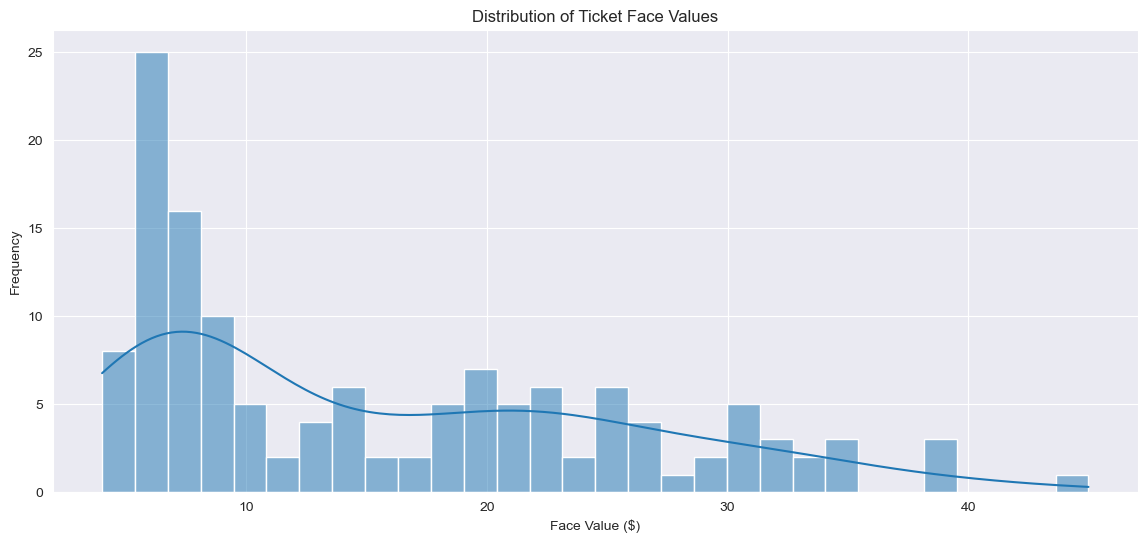

In [6]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df_updated, x='face value', bins=30, kde=True)  # KDE for smooth distribution curve
plt.title('Distribution of Ticket Face Values')
plt.xlabel('Face Value ($)')
plt.ylabel('Frequency')
plt.show()


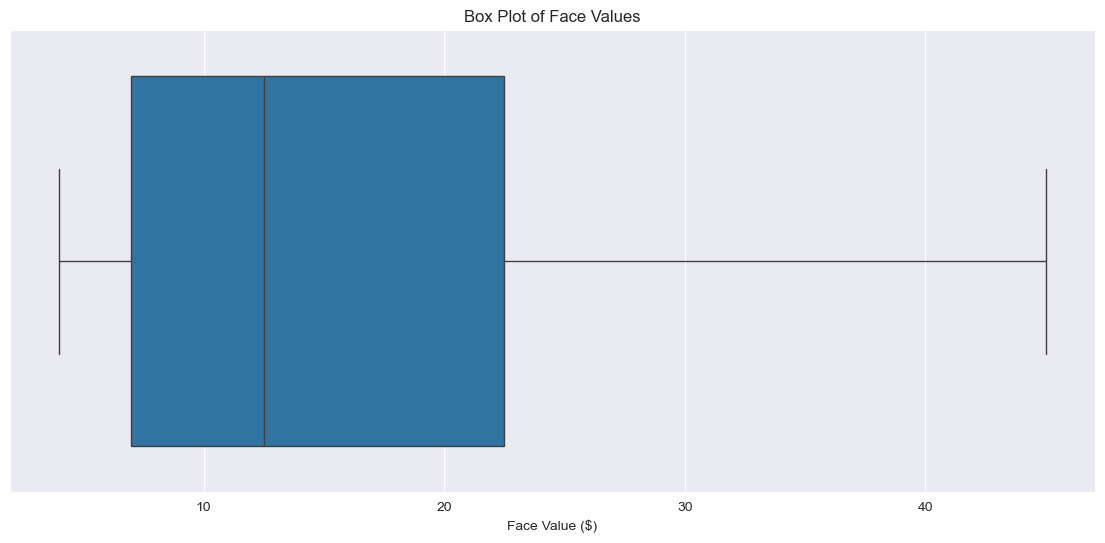

In [7]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_updated, x='face value')
plt.title('Box Plot of Face Values')
plt.xlabel('Face Value ($)')
plt.show()


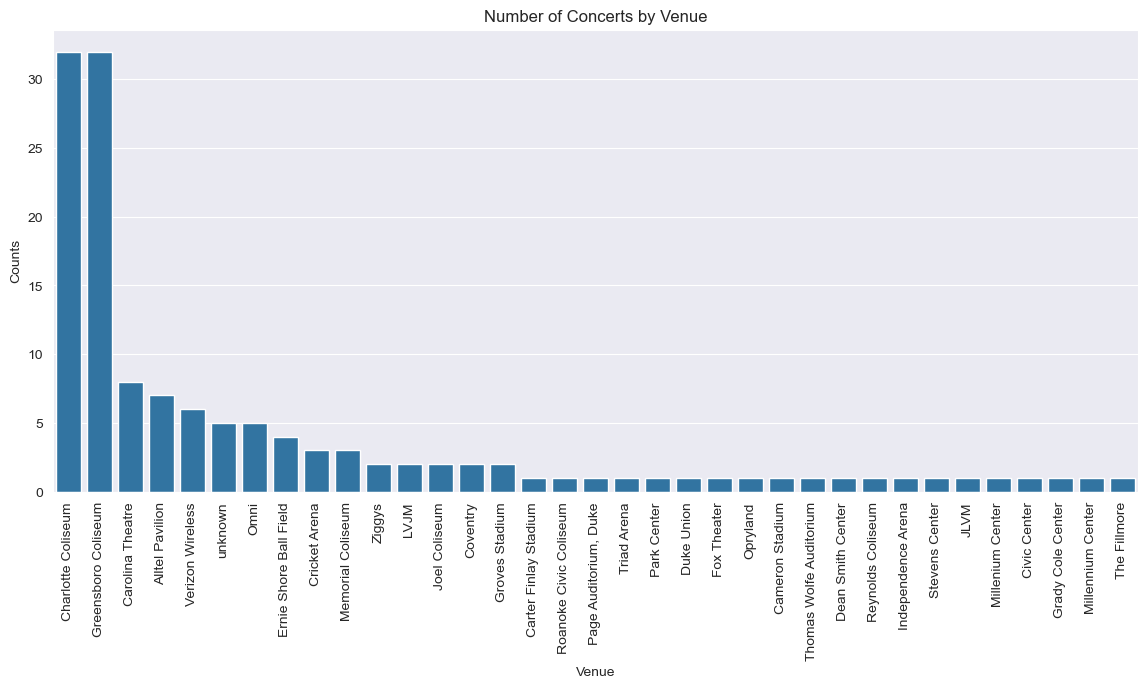

In [8]:
plt.figure(figsize=(14, 6))
venue_counts = df_updated['venue'].value_counts().reset_index()
venue_counts.columns = ['Venue', 'Counts']
venue_counts = venue_counts.sort_values('Counts', ascending=False)
sns.barplot(data=venue_counts, x='Venue', y='Counts')
plt.title('Number of Concerts by Venue')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()


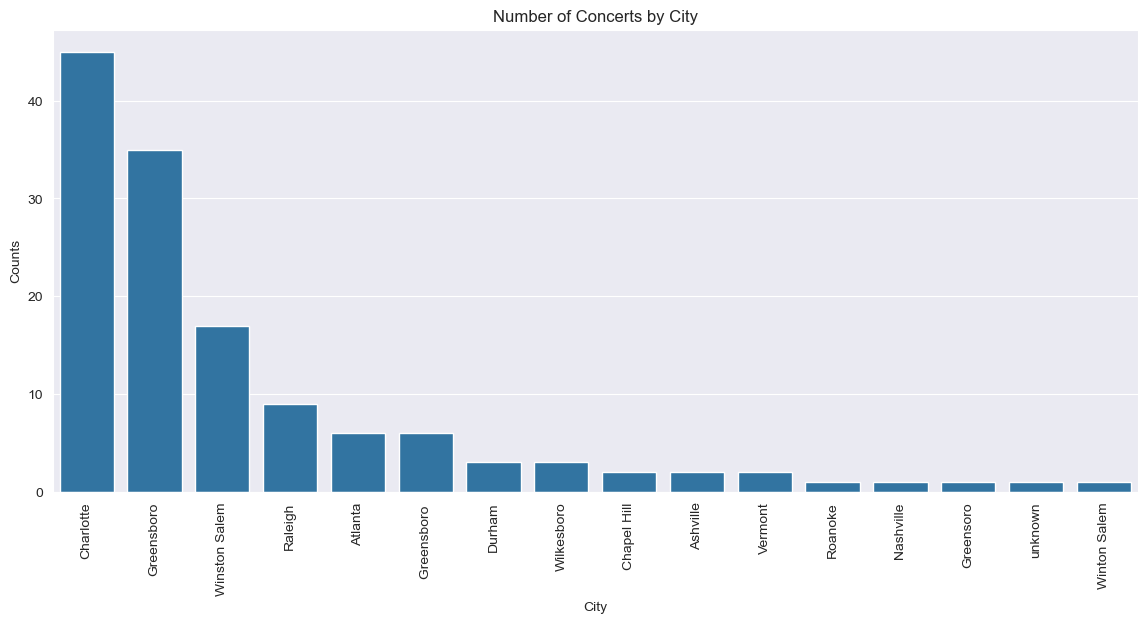

In [9]:
plt.figure(figsize=(14, 6))
city_counts = df_updated['city'].value_counts().reset_index()
city_counts.columns = ['City', 'Counts']
city_counts = city_counts.sort_values('Counts', ascending=False)
sns.barplot(data=city_counts, x='City', y='Counts')
plt.title('Number of Concerts by City')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()


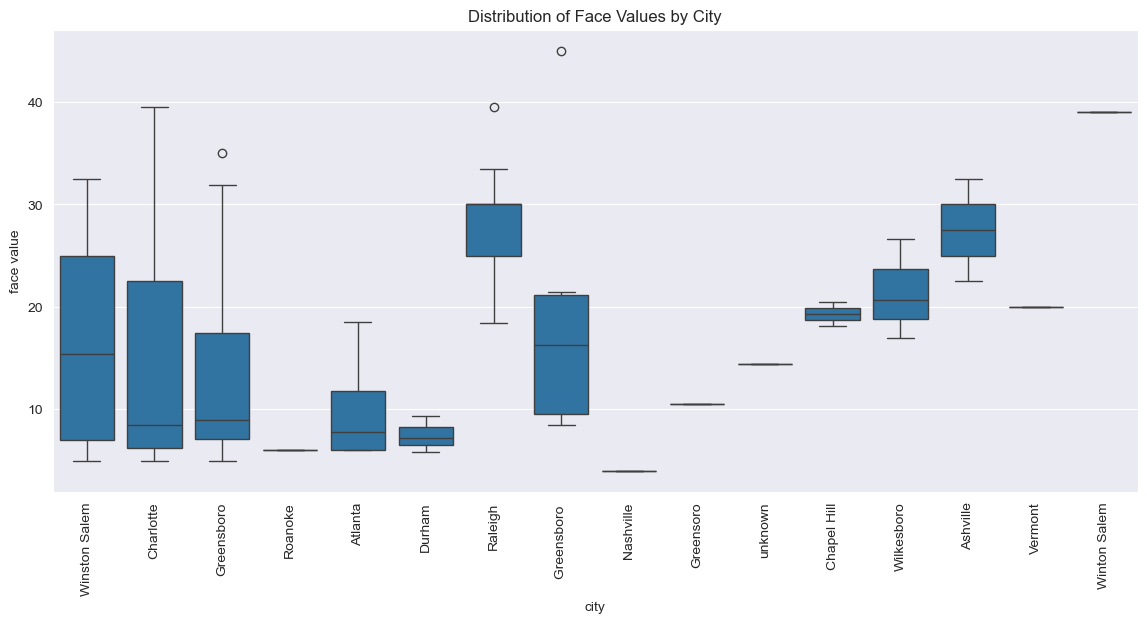

In [10]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_updated, x='city', y='face value')
plt.title('Distribution of Face Values by City')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()


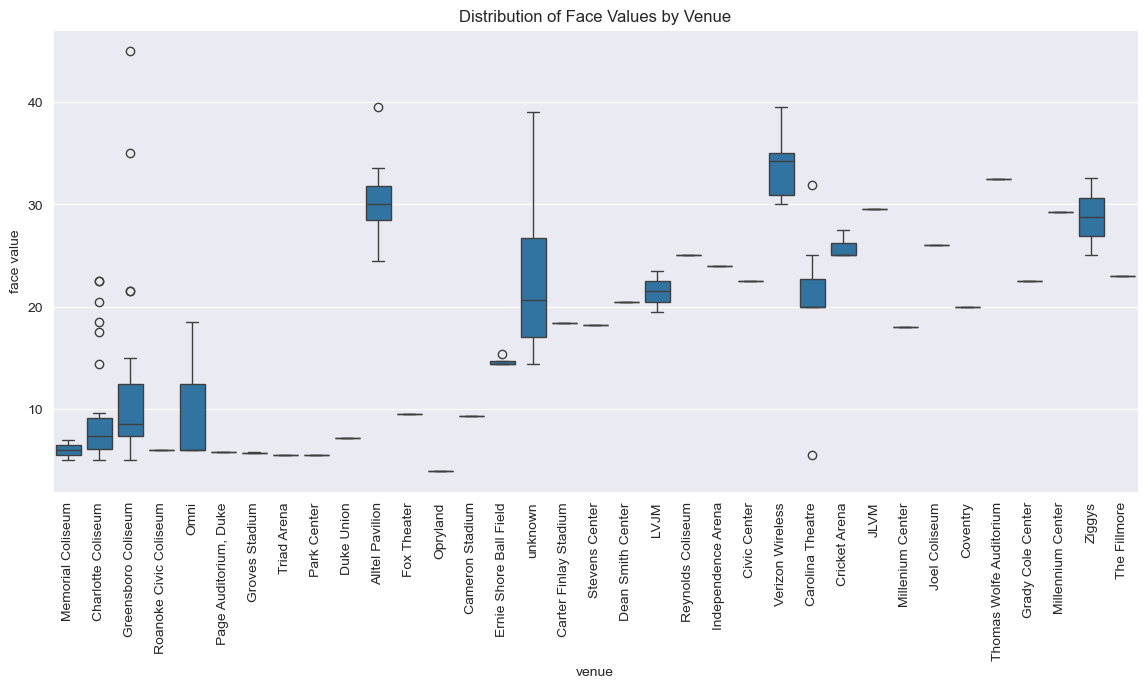

In [11]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_updated, x='venue', y='face value')
plt.title('Distribution of Face Values by Venue')
plt.xticks(rotation=90)  # Rotate x-labels for better readability
plt.show()


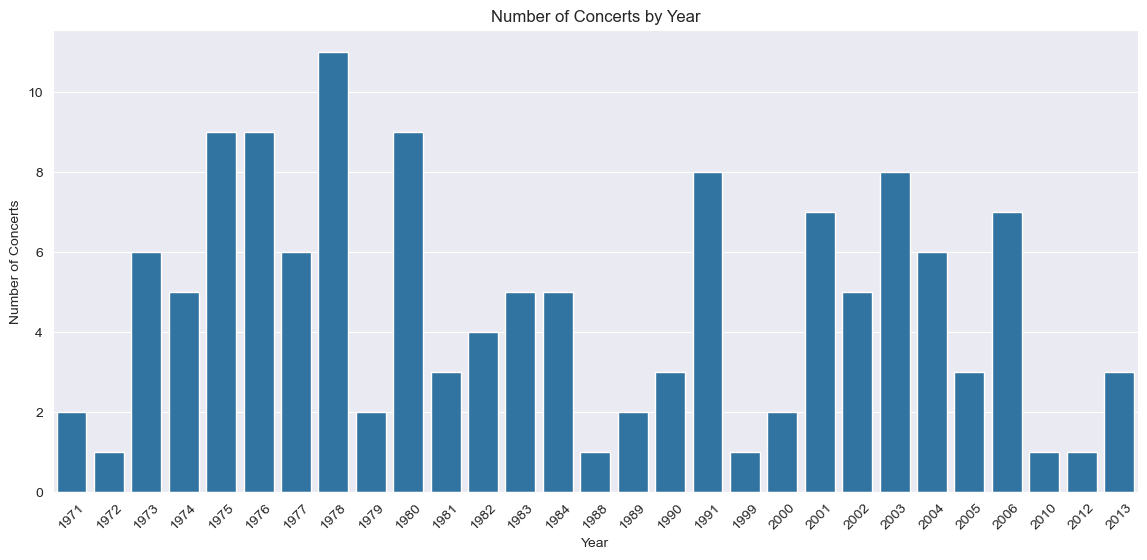

In [12]:

# Count concerts per year
year_counts = df_updated['year'].value_counts().sort_index()

# Create a bar plot of concert counts by year
plt.figure(figsize=(14, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of Concerts by Year')
plt.xlabel('Year')
plt.ylabel('Number of Concerts')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()
